# Real Estate Price Prediction (REPP)

Importing Libraries

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

from sklearn.svm import SVR

Importing Dataset

In [2]:
# names = (No	X1 transaction date	X2 house age	X3 distance to the nearest MRT station	X4 number of convenience stores	X5 latitude	X6 longitude	Y house price of unit area
# )
names = ('No', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'Y')
df = pd.read_csv('Real estate.csv', names = names)

Exploratory Data Analysis

In [3]:
df.head()

,No,X1,X2,X3,X4,X5,X6,Y
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
df.isnull().sum()

No    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
Y     0
dtype: int64

In [5]:
df.describe()

,No,X1,X2,X3,X4,X5,X6,Y
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


<AxesSubplot:>

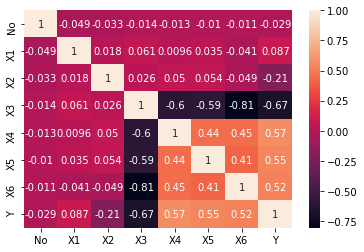

In [6]:
# plt.figsize(10, 9)
sns.heatmap(df.corr(), annot = True)

Regression

In [7]:
y = df.Y
x = df.drop('No', axis =  1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.20, random_state = 176)

In [8]:
print(xtrain.shape, xtest.shape, ytrain.shape, ytest.shape)

(331, 7) (83, 7) (331,) (83,)


In [10]:
models = {'LinearRegression' : make_pipeline(StandardScaler(), LinearRegression()),
    'SVRegression' : make_pipeline(StandardScaler(), SVR()),
    'Lasso' : make_pipeline(StandardScaler(), Lasso(random_state=123)),
    'Ridge' : make_pipeline(StandardScaler(), Ridge(random_state=123)),
    'ElasticNet' : make_pipeline(StandardScaler(), ElasticNet(random_state=123)),
    'RandomForest' : make_pipeline(StandardScaler(), RandomForestRegressor(random_state=123)),
    'GradientBoosting' : make_pipeline(StandardScaler(), GradientBoostingRegressor(random_state=123))}


In [11]:
models

{'LinearRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'SVRegression': Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]),
 'Lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('lasso', Lasso(random_state=123))]),
 'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(random_state=123))]),
 'ElasticNet': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('elasticnet', ElasticNet(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingregressor',
                  GradientBoostingRegressor(random_state=123))])}

In [12]:
models_fit = {}
for name, model in models.items():
    model.fit(xtrain, ytrain)
    models_fit[name] = model
    print(f'{name}')

LinearRegression
SVRegression
Lasso
Ridge
ElasticNet
RandomForest
GradientBoosting


In [13]:
models_fit

{'LinearRegression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())]),
 'SVRegression': Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]),
 'Lasso': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('lasso', Lasso(random_state=123))]),
 'Ridge': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('ridge', Ridge(random_state=123))]),
 'ElasticNet': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('elasticnet', ElasticNet(random_state=123))]),
 'RandomForest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestregressor',
                  RandomForestRegressor(random_state=123))]),
 'GradientBoosting': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('gradientboostingregressor',
                  GradientBoostingRegressor(random_state=123))])}

In [14]:
for name, model in models_fit.items():
    ypred = model.predict(xtest)
    print(f'{name:}')
    print(f'{r2_score(ytest, ypred)}')
    print(f'{mae(ytest, ypred)}')

LinearRegression
1.0
8.389540735480701e-15
SVRegression
0.8759367038388034
2.664625765140824
Lasso
0.9946897862415641
0.697802803972228
Ridge
0.9999808817617007
0.04253806007877597
ElasticNet
0.8879738032864163
3.1636303471713227
RandomForest
0.9960529088554829
0.21815662650602435
GradientBoosting
0.9965187041928524
0.25426258538754937


HyperParameter Tuning

In [33]:
model = make_pipeline(StandardScaler(), SVR(kernel='linear', degree=3, gamma='scale', coef0=0.0, tol=0.001, C=1.0,
                                            epsilon=0.1, shrinking=True, cache_size=200, verbose=False, max_iter=- 1))

model.fit(xtrain, ytrain)

ypred = model.predict(xtest)
print(f'{r2_score(ytest, ypred)}')
print(f'{mae(ytest, ypred)}')

0.9999834412368116
0.040649714378742575


In [24]:
ypred

array([36.57459956, 38.13988409, 29.44936602, 40.81840251, 16.15755487,
       47.42098457, 48.54768881, 31.33293998, 45.49572078, 47.02349695,
       34.39450486, 32.58801337, 38.91531111, 36.78453208, 41.40393622,
       38.10799822, 60.62714725, 12.15962788, 33.13462439, 42.22061649,
       70.87615105, 47.34573021, 58.10194377, 42.17685356, 30.65385918,
       50.66455326, 27.713647  , 42.0527219 , 40.22866976, 52.66339076,
       40.20859771, 45.10432479, 30.53837967, 44.54288035, 24.63963238,
       29.49038071, 52.15514659, 38.81960404, 39.01192228, 45.24172449,
       62.04314507, 48.58827856, 40.29129866, 27.08856853, 43.20622789,
       37.39719526, 26.97502524, 36.33562121, 41.95121936, 35.35542381,
       35.6546601 , 46.96047492, 25.60199082, 58.9978176 , 19.16871556,
       44.93829261, 37.94962883, 58.7538948 , 41.51094167, 46.22105088,
       29.56640822, 35.16380122, 40.53482344, 27.39743354, 53.43336046,
       59.58772558, 34.43794978, 60.65928062, 18.4004921 , 23.19

In [25]:
np.array(ytest)

array([36.5, 38.1, 29.4, 40.8, 16.1, 47.4, 48.5, 31.3, 45.5, 47. , 34.3,
       32.5, 38.9, 36.7, 41.4, 38.1, 60.7, 12.2, 33.1, 42.2, 71. , 47.3,
       58.1, 42.2, 30.6, 50.7, 27.7, 42. , 40.2, 52.7, 40.2, 45.1, 30.5,
       44.5, 24.6, 29.5, 52.2, 38.8, 39. , 45.2, 62.1, 48.6, 40.3, 27. ,
       43.2, 37.4, 26.9, 36.3, 41.9, 35.3, 35.6, 47. , 25.6, 59. , 19.1,
       44.9, 37.9, 58.8, 41.5, 46.2, 29.5, 35.1, 40.5, 27.3, 53.5, 59.6,
       34.4, 60.7, 18.3, 23.1, 25.7, 34.1, 29.3, 28.9, 53. , 24.5, 17.4,
       57.8, 57.1, 46.6, 40.1, 54.4, 21.8])

More Model(s) With Randomized Search

In [26]:
from sklearn.model_selection import RandomizedSearchCV as RS

In [31]:
rf_hyperparameters = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree' : [1, 2, 3, 4, 5], 
    'gamma' : ['scale', 'auto']
}

In [34]:
model1 = SVR()
model1 = RS(model1, rf_hyperparameters, n_jobs = -1)
model1.fit(xtrain, ytrain)
model1.best_params_
ypred1 = model1.predict(xtest)
print(f'{r2_score(ytest, ypred1)}')
print(f'{mae(ytest, ypred1)}')

0.9999895573044989
0.030727994505229842


In [35]:
model1.best_params_
print(model1.best_params_)

{'kernel': 'linear', 'gamma': 'auto', 'degree': 4}


In [36]:
print(ypred1)

[36.52591624 38.09144363 29.43829506 40.81222134 16.19319869 47.41404287
 48.46030899 31.33492534 45.53148092 47.01991696 34.33785929 32.54431805
 38.93562794 36.73307419 41.44556679 38.13391387 60.66229077 12.15448651
 33.18992331 42.19389187 70.9714795  47.29937055 58.07797578 42.2081747
 30.66646407 50.71969243 27.73760787 41.98991755 40.19593905 52.68811504
 40.19109445 45.13285592 30.54647128 44.52875695 24.67579607 29.51349669
 52.25657555 38.81999707 39.0707494  45.21597545 62.08832228 48.62494771
 40.32435247 27.0382429  43.24722611 37.43508044 26.94969399 36.29751775
 41.88995814 35.30986714 35.64069916 47.03153549 25.62935634 58.97594224
 19.18591867 44.90660171 37.8898413  58.80245664 41.50304259 46.22220907
 29.56902621 35.12920777 40.52949648 27.30800245 53.50620226 59.59276566
 34.43007132 60.69858229 18.38856002 23.19067472 25.72996775 34.13679521
 29.31051777 28.97005489 53.00621832 24.56689825 17.39900411 57.78842714
 57.1012859  46.58309461 40.13414479 54.36777363 21.

In [37]:
print(np.array(ytest))

[36.5 38.1 29.4 40.8 16.1 47.4 48.5 31.3 45.5 47.  34.3 32.5 38.9 36.7
 41.4 38.1 60.7 12.2 33.1 42.2 71.  47.3 58.1 42.2 30.6 50.7 27.7 42.
 40.2 52.7 40.2 45.1 30.5 44.5 24.6 29.5 52.2 38.8 39.  45.2 62.1 48.6
 40.3 27.  43.2 37.4 26.9 36.3 41.9 35.3 35.6 47.  25.6 59.  19.1 44.9
 37.9 58.8 41.5 46.2 29.5 35.1 40.5 27.3 53.5 59.6 34.4 60.7 18.3 23.1
 25.7 34.1 29.3 28.9 53.  24.5 17.4 57.8 57.1 46.6 40.1 54.4 21.8]
